# Beispiel 5.3

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
from scipy.interpolate import PchipInterpolator
from scipy.stats import linregress

Matplotlib is building the font cache; this may take a moment.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
einkommen = pd.read_csv("./Daten/Einkommen.csv").drop("Unnamed: 0", axis=1)
einkommen.head()

,Ausbildung,Erfahrung,Einkommen
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922


In [3]:
import bambi as bmb
model_th = bmb.Model("Einkommen ~ Ausbildung+Erfahrung", einkommen)
idata_th = model_th.fit(random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, Ausbildung, Erfahrung]


/opt/conda/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [4]:
az.summary(idata_th)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Ausbildung,5.883,0.369,5.175,6.563,0.005,0.004,4847.0,3343.0,1.0
Erfahrung,0.173,0.026,0.124,0.219,0.000,0.000,4332.0,2885.0,1.0
Intercept,-49.850,6.227,-61.534,-37.672,0.085,0.060,5516.0,3064.0,1.0
sigma,7.494,1.053,5.715,9.577,0.017,0.012,4133.0,3268.0,1.0


/opt/conda/lib/python3.10/site-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
Default computed for conditional variable: Erfahrung
Default computed for unspecified variable: Ausbildung


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='Erfahrung', ylabel='Einkommen'>], dtype=object))

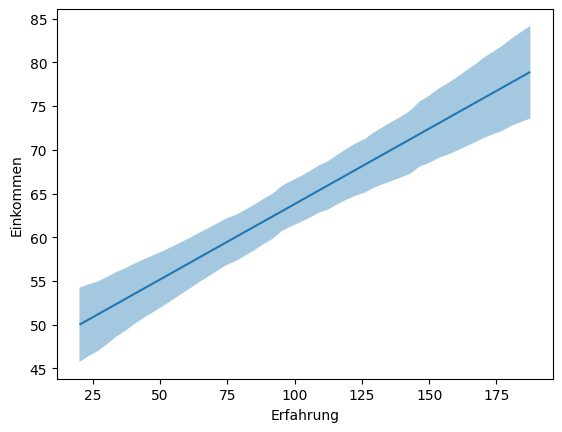

In [5]:
bmb.interpret.plot_predictions(model_th, idata_th, "Erfahrung")